In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
boston = load_boston()

In [7]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [66]:
data = boston["data"]
feature_names = boston["feature_names"]
target = boston.target
X = pd.DataFrame(data, columns = feature_names)
y = pd.DataFrame(target, columns=["price"])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [99]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_test_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.396809,-0.500320,-1.007111,-0.278089,-0.395412,0.141282,0.555916,-0.545853,-0.507797,-0.650926,-0.771951,0.428872,-0.481210
1,-0.400796,1.229499,-0.664391,3.595975,-0.931315,0.623942,-1.275254,0.126565,-0.624360,-0.903989,-0.322703,0.444180,-1.257094
2,-0.395234,-0.500320,2.433163,-0.278089,0.446720,-0.469805,1.081663,-0.911447,-0.624360,1.849573,0.800418,0.369934,0.790338
3,-0.396825,-0.500320,-0.025421,-0.278089,-1.220532,-0.354079,-2.172957,0.694876,-0.624360,-0.596698,0.396095,0.378682,-0.976875
4,0.167084,-0.500320,1.033237,-0.278089,1.331384,-0.026661,0.831307,-0.676503,1.706891,1.578434,0.845343,0.315043,0.677687
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1.715000,-0.500320,1.033237,-0.278089,0.344643,-2.382098,1.124581,-1.059057,1.706891,1.578434,0.845343,-3.580942,3.085604
98,1.219719,-0.500320,1.033237,-0.278089,1.561057,0.204790,0.884955,-0.848260,1.706891,1.578434,0.845343,-3.595156,0.787522
99,1.177967,-0.500320,1.033237,-0.278089,0.344643,0.481403,1.124581,-1.071460,1.706891,1.578434,0.845343,-3.512491,1.233902
100,-0.401311,-0.500320,-0.943214,-0.278089,-0.914302,-0.424644,-0.838921,0.290806,-0.740922,-0.946166,0.081621,0.434230,0.056698


In [134]:
tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)

In [152]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


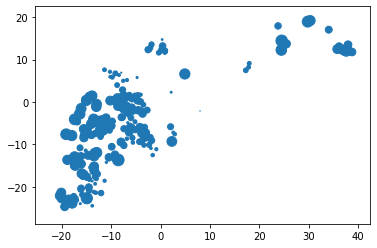

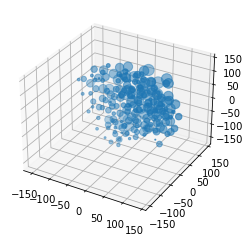

In [147]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
tsne3 = TSNE(n_components = 3, learning_rate = 250, random_state = 42)
X_train_tsne = tsne3.fit_transform(X_train_scaled)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], X_train_tsne[:, 2], s = y)


In [148]:
X_train_scaled


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.387850,-0.500320,-0.352167,-0.278089,-0.310348,-0.677264,0.834884,-0.750355,-0.507797,-0.120700,1.159817,0.430731,0.873419
400,-0.373414,0.364589,-0.584520,-0.278089,-0.786706,-0.649038,-0.946216,0.291651,-0.740922,-1.090773,0.126546,0.353970,0.076412
401,-0.405470,2.959318,-1.303361,-0.278089,-1.033391,0.450354,-1.389703,2.130899,-0.624360,-0.747331,-0.592251,0.379010,-0.910692
402,0.851897,-0.500320,1.033237,-0.278089,1.561057,0.441886,0.931450,-0.790898,1.706891,1.578434,0.845343,-2.694586,1.522570


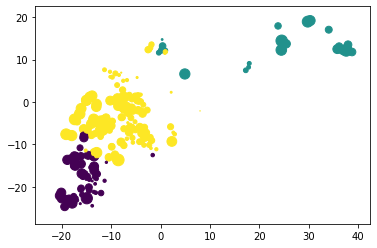

In [155]:
kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)
labels_train = kmeans.fit_predict(X_train_scaled)
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train, s = y)
plt.show()

In [156]:
kmeans.inertia_

2820.517707291972

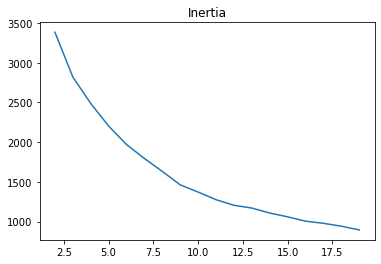

In [157]:
inertias = []

for i in range(2, 20):
    temp_model = KMeans(n_clusters = i, random_state = 100)
    temp_model.fit(X_train_scaled)
    
    temp_inertia = temp_model.inertia_
    
    inertias.append(temp_inertia)

plt.plot(range(2, 20), inertias)

plt.title('Inertia')

plt.show()

In [94]:
y_train.mean()

price    22.796535
dtype: float64

In [95]:
y_train[labels_train == 0].mean()

price    27.788372
dtype: float64

In [96]:
y_train[labels_train == 1].mean()

price    16.165354
dtype: float64

In [97]:
y_train[labels_train == 2].mean()

price    24.958115
dtype: float64

In [98]:
X_train.loc[labels_train == 0, 'CRIM'].mean()

0.07356558139534886

In [36]:
labels_test = kmeans.predict(X_test_scaled)

In [37]:
y_train[labels_train == 0].mean()

price    27.788372
dtype: float64

In [38]:
y_train[labels_train == 1].mean()

price    16.165354
dtype: float64

In [39]:
y_train[labels_train == 2].mean()

price    24.958115
dtype: float64

In [40]:
X_train.loc[labels_train == 0, 'CRIM'].mean()

0.07356558139534886

In [41]:
X_train.loc[labels_train == 1, 'CRIM'].mean()

10.797028425196853

In [42]:
X_train.loc[labels_train == 2, 'CRIM'].mean()

0.42166020942408367

In [45]:
print('Кластер 0, признак CRIM: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1, признак CRIM: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2, признак CRIM: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0, признак CRIM: 0.07356558139534886
Кластер 1, признак CRIM: 10.797028425196853
Кластер 2, признак CRIM: 0.42166020942408367


In [49]:
labels_test = kmeans.fit_predict(X_test_scaled)

In [50]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

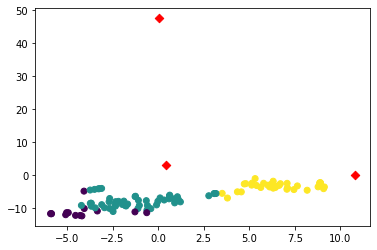

In [117]:
kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)
labels_train = kmeans.fit_predict(X_train_scaled)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c = labels_test)
plt.show()

In [52]:
print('Кластер 0, признак CRIM: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1, признак CRIM: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2, признак CRIM: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Кластер 0, признак CRIM: 0.08618571428571427
Кластер 1, признак CRIM: 0.25200716981132076
Кластер 2, признак CRIM: 10.165531142857143


In [59]:
y_test[labels_test == 0].mean()

price    33.871429
dtype: float64

In [60]:
y_test[labels_test == 1].mean()

price    21.55283
dtype: float64

In [61]:
y_test[labels_test == 2].mean()

price    16.437143
dtype: float64

In [107]:
labels_test


array([1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 2, 1, 0,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       2, 1, 0, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1])

In [106]:
labels_train.size

404